# Example for bagel-factor package

Steps:

1. Prepare data
2. Evaluator object and its methods
3. Visualization

---

## 0. Loading the package

In [1]:
from bagel_factor import FactorData  # DataFrame wrapper to ensure correct data types
from bagel_factor import cross_sectional_zscore  # Preprocessing function
from bagel_factor import Evaluator  # Evaluator class for factor analysis
from bagel_factor import plot_ic_series, plot_quantile_returns, plot_cumulative_spread

## 1. Prepare data

In [2]:
import pandas as pd
factor = pd.read_csv(
            'tests/test_data/roe.csv',
            parse_dates=['date'],
            index_col=['date', 'ticker']
)['roe'].sort_index()
    
price = pd.read_csv(
    'tests/test_data/price.csv',
    usecols=['date', 'ticker', 'adj_close'],
    parse_dates=['date'],
    index_col=['date', 'ticker']
)['adj_close'].sort_index()
# Drop duplicate indices
price = price[~price.index.duplicated(keep='first')]
factor = factor[~factor.index.duplicated(keep='first')]

returns_20d = price.groupby(level='ticker').pct_change(1, fill_method=None)
future_returns = returns_20d.shift(-1).dropna()  # Future returns

In [3]:
factor_data = FactorData(factor, factor_name='roe', validate=False, enforce_sorted=False)
future_returns_data = FactorData(future_returns, factor_name='future_ret_20d', validate=False, enforce_sorted=False)

print(f'Factor data: {factor_data}')
print(f'Future returns: {future_returns_data}')

Factor data: FactorData(name=roe, size=72571)
Future returns: FactorData(name=future_ret_20d, size=4805740)


### Preprocessing

In [4]:
factor_data_z = factor_data.standardize(method=cross_sectional_zscore)

## 2. Evaluator object and its methods


In [5]:
evaluator = Evaluator(
    factor_data=factor_data_z,
    future_returns_for_ic=future_returns_data,
    future_returns_for_quantile=future_returns_data,
    factor_name='roe'
)

/opt/homebrew/Caskroom/miniconda/base/envs/bagel-factor/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:571: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/opt/homebrew/Caskroom/miniconda/base/envs/bagel-factor/lib/python3.13/site-packages/numpy/_core/_methods.py:136: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/opt/homebrew/Caskroom/miniconda/base/envs/bagel-factor/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/homebrew/Caskroom/miniconda/base/envs/bagel-factor/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/opt/homebrew/Caskroom/miniconda/base/envs/bagel-factor/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_di

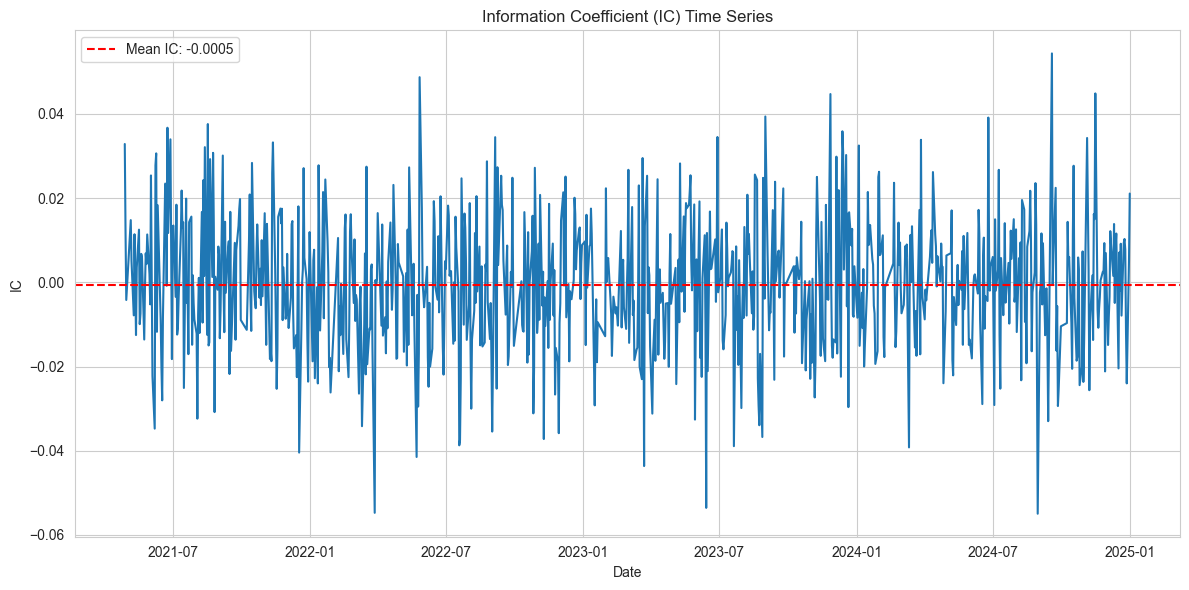

In [6]:
ic_series = evaluator.ic_series()
ic_fig = plot_ic_series(ic_series)

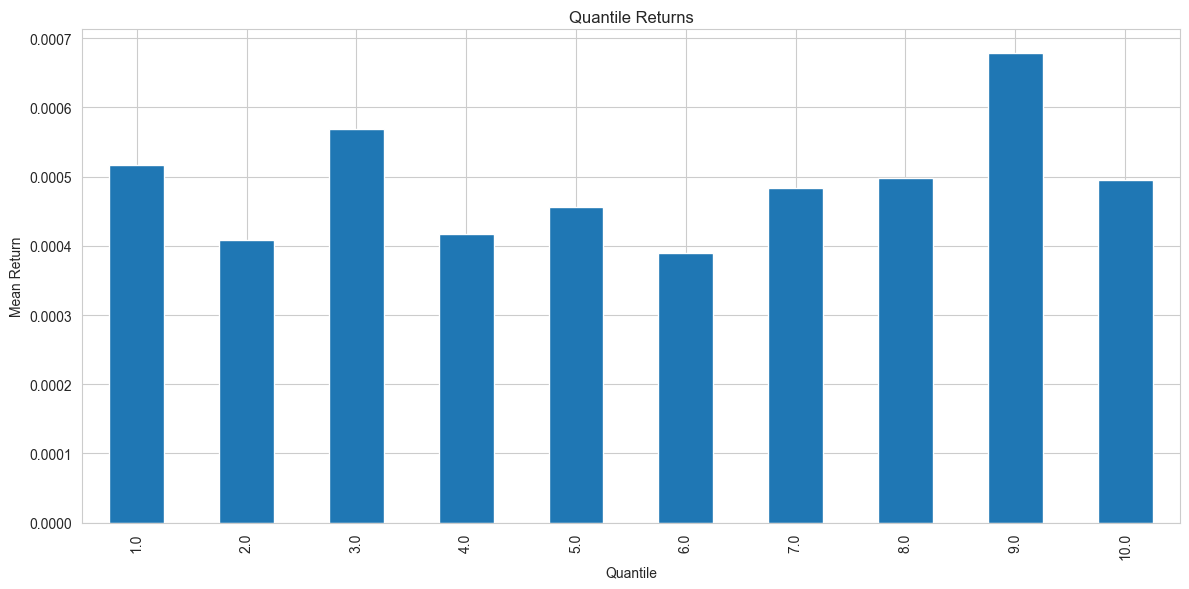

In [7]:
quantile_return_df = evaluator.quantile_return_df()
quantile_return_fig = plot_quantile_returns(quantile_return_df)